In [1]:
%matplotlib inline

# Trying decomposition algorithms to see if we can separate foreground from NGC6822



In [64]:
from spectral_cube import SpectralCube

from pathlib import Path

In [3]:
sd_data_path = Path("/reduction10/erickoch/LGLBS/hi_feathering/")
vla_data_path = Path("/reduction10/erickoch/LGLBS/C+D_HI_2023/")

galaxy_dict = {'ic10': ['IC10_GBT_Jy.fits',
                        0.96],
               'ngc6822': ["NGC6822-center_cube.fits",
                           0.92],
               'wlm': ['WLM_GBT.FITS',
                       1.14],
               'ic1613': ['IC1613_GBT_vegas_K_noresample_lsrk.fits', 
                          0.89],
               }


In [4]:
cube = SpectralCube.read(vla_data_path / "ngc6822_C+D_himidres_feathered.K.fits")
cube.allow_huge_operations = True

In [5]:
# mean_cube = cube.mean(axis=(1, 2))

In [6]:
# mean_cube.quicklook()

In [7]:
from sklearn.decomposition import FastICA

In [8]:
# # Simplest: grab a distribution of spectra.
# # X = mean_cube.value[np.isfinite(mean_cube)][:, np.newaxis]



# ica = FastICA(n_components=2, whiten="arbitrary-variance")
# S_ = ica.fit_transform(X)  # Reconstruct signals
# A_ = ica.mixing_  # Get estimated mixing matrix

### Checkout what PCA provides as implemented in turbustat

In [10]:
from turbustat.statistics import PCA

In [17]:
pca = PCA(cube.hdu)

In [48]:
pca.compute_pca(mean_sub=True,
                n_eigs='auto', min_eigval=0.99, eigen_cut_method='proportion',
                show_progress=True)

/home/erickoch/anaconda3/envs/pyuvdata_ewk/lib/python3.10/site-packages/turbustat/statistics/threeD_to_twoD.py:146: RuntimeWarning: Mean of empty slice
  norm_chan2 -= np.nanmean(chan2)


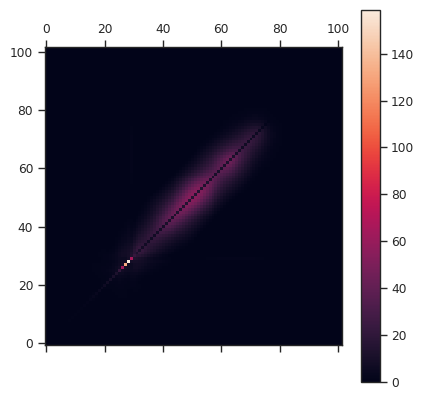

In [50]:
plt.matshow(pca.cov_matrix, origin='lower', vmin=0,)# vmax=50)
plt.colorbar()

In [22]:
pca.cov_matrix[10, 11]

1.9868489722182858

In [61]:
eig_images = pca.eigimages(n_eigs=10)

In [62]:
eig_images.shape

(10, 2400, 2304)

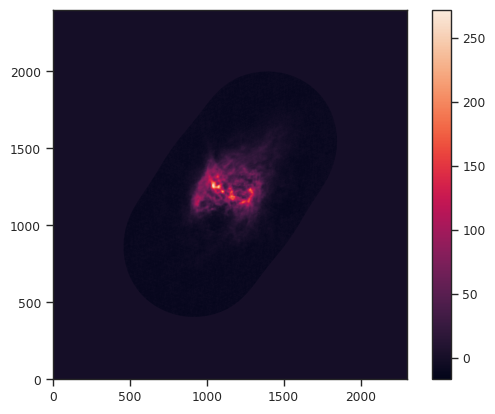

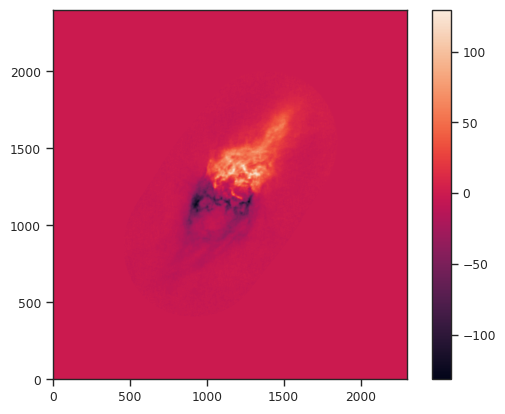

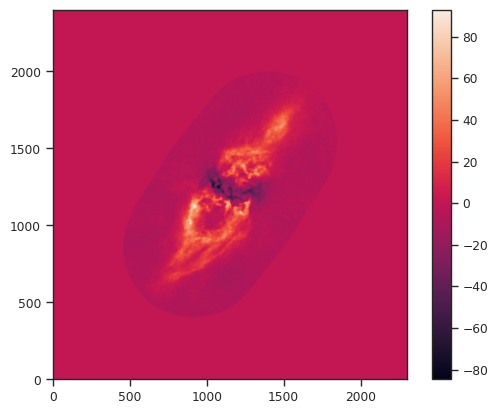

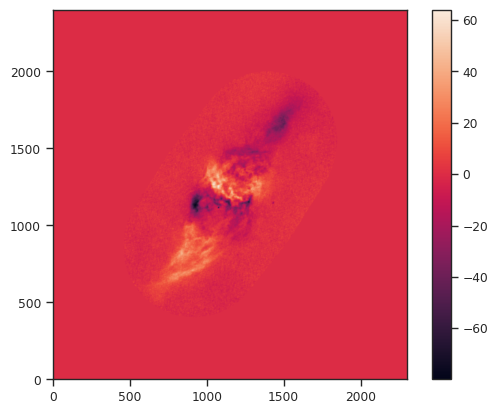

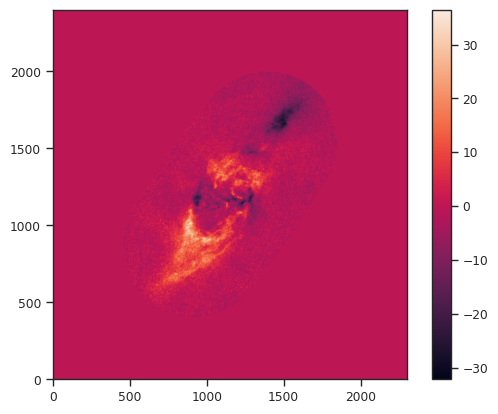

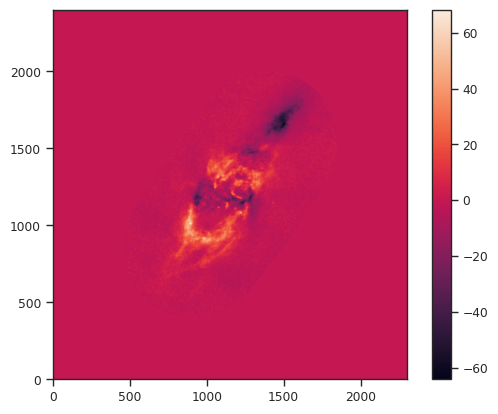

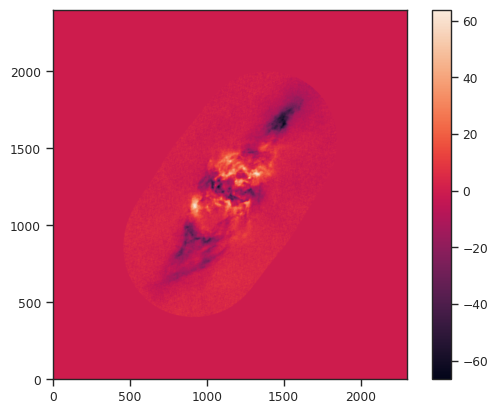

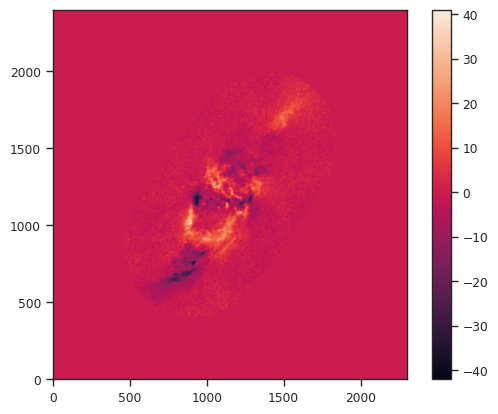

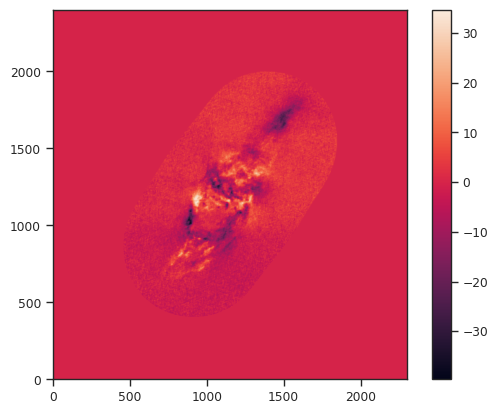

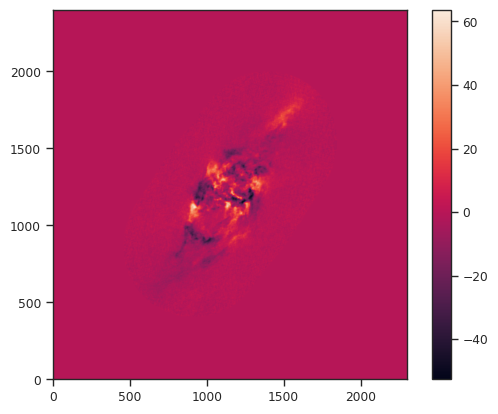

In [63]:
for this_img in eig_images:
    plt.figure()
    plt.subplot(111)
    plt.imshow(this_img, origin='lower')
    plt.colorbar()
    # plt.draw()

In [59]:
pca.eigvecs.shape

(102, 102)

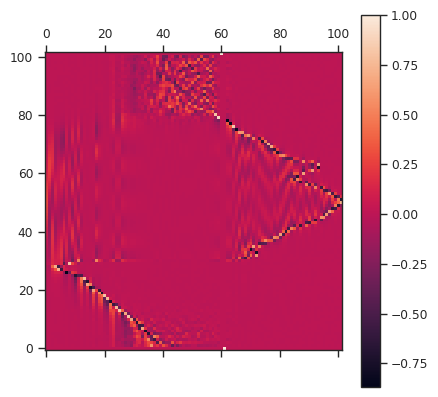

In [60]:
plt.matshow(pca.eigvecs, origin='lower')
plt.colorbar()